In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
df.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [ ]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [ ]:
for col in df.columns:

  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)

df.isnull().sum().sum()

np.int64(0)

In [ ]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity ', 'cloud ', 'sunshine', '         winddirection', 'windspeed']


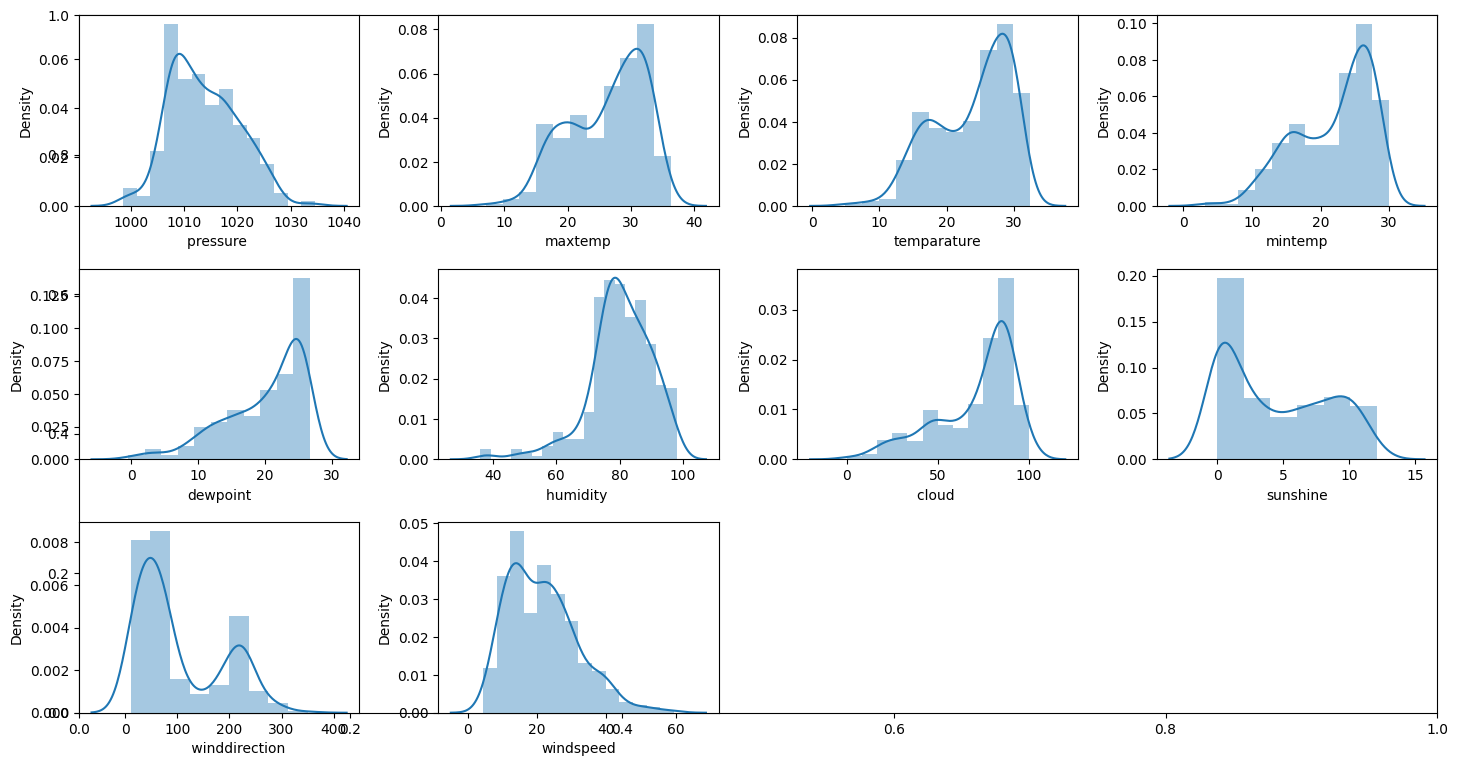

In [ ]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [ ]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

In [ ]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

In [ ]:
X_train, X_val,Y_train, Y_val = train_test_split(features, target,test_size=0.2,stratify=target,random_state=2)

# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

# Convert 'yes' to 1 and 'no' to 0
Y = Y.map({'yes': 1, 'no': 0})
Y_val = Y_val.map({'yes': 1, 'no': 0})

In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [ ]:
models = [LogisticRegression(), XGBClassifier()]

for i in range(2):
  models[i].fit(X, Y)

  print(f'{models[i]} : ')

  train_preds = models[i].predict_proba(X)
  print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))

  val_preds = models[i].predict_proba(X_val)
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.8893209767430116
Validation Accuracy :  0.8966666666666667

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999999999999999
Validation Accuracy :  0.8391666666666666



In [ ]:
# Make predictions using the first model (Logistic Regression) on the validation set
y_pred = models[0].predict(X_val)

# Print a classification report to evaluate the model
print(metrics.classification_report(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.88      0.90      0.89        50

    accuracy                           0.85        74
   macro avg       0.83      0.82      0.83        74
weighted avg       0.85      0.85      0.85        74



In [ ]:
import joblib
joblib.dump(models[1],'model1.pkl')
joblib.dump(models[0], 'model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [ ]:
df.head()

,day,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,18.3,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,18.9,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,19.3,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,20.6,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,20.7,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
df.tail()

,day,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,17.7,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,17.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,17.7,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,17.3,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,17.8,13.0,74,66,no,5.7,20.0,23.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   temparature             366 non-null    float64
 3   dewpoint                366 non-null    float64
 4   humidity                366 non-null    int64  
 5   cloud                   366 non-null    int64  
 6   rainfall                366 non-null    object 
 7   sunshine                366 non-null    float64
 8            winddirection  366 non-null    float64
 9   windspeed               366 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 28.7+ KB
